Mounting google drive for storage media

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Installation of library

In [ ]:
!pip install imblearn

Ignoring warning and importing library

In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Understanding the Dataset

## Loading the Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Exploratory Data Analysis

In [ ]:
df.shape
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [ ]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


find NA and duplicated row

In [ ]:
df.isna().sum()
df.duplicated().sum()


23899

There are 23899 rows which are duplicated, we need to drop these rows.

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(229781, 22)

Plotting histogram

array([[<Axes: title={'center': 'Diabetes_012'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title={'c

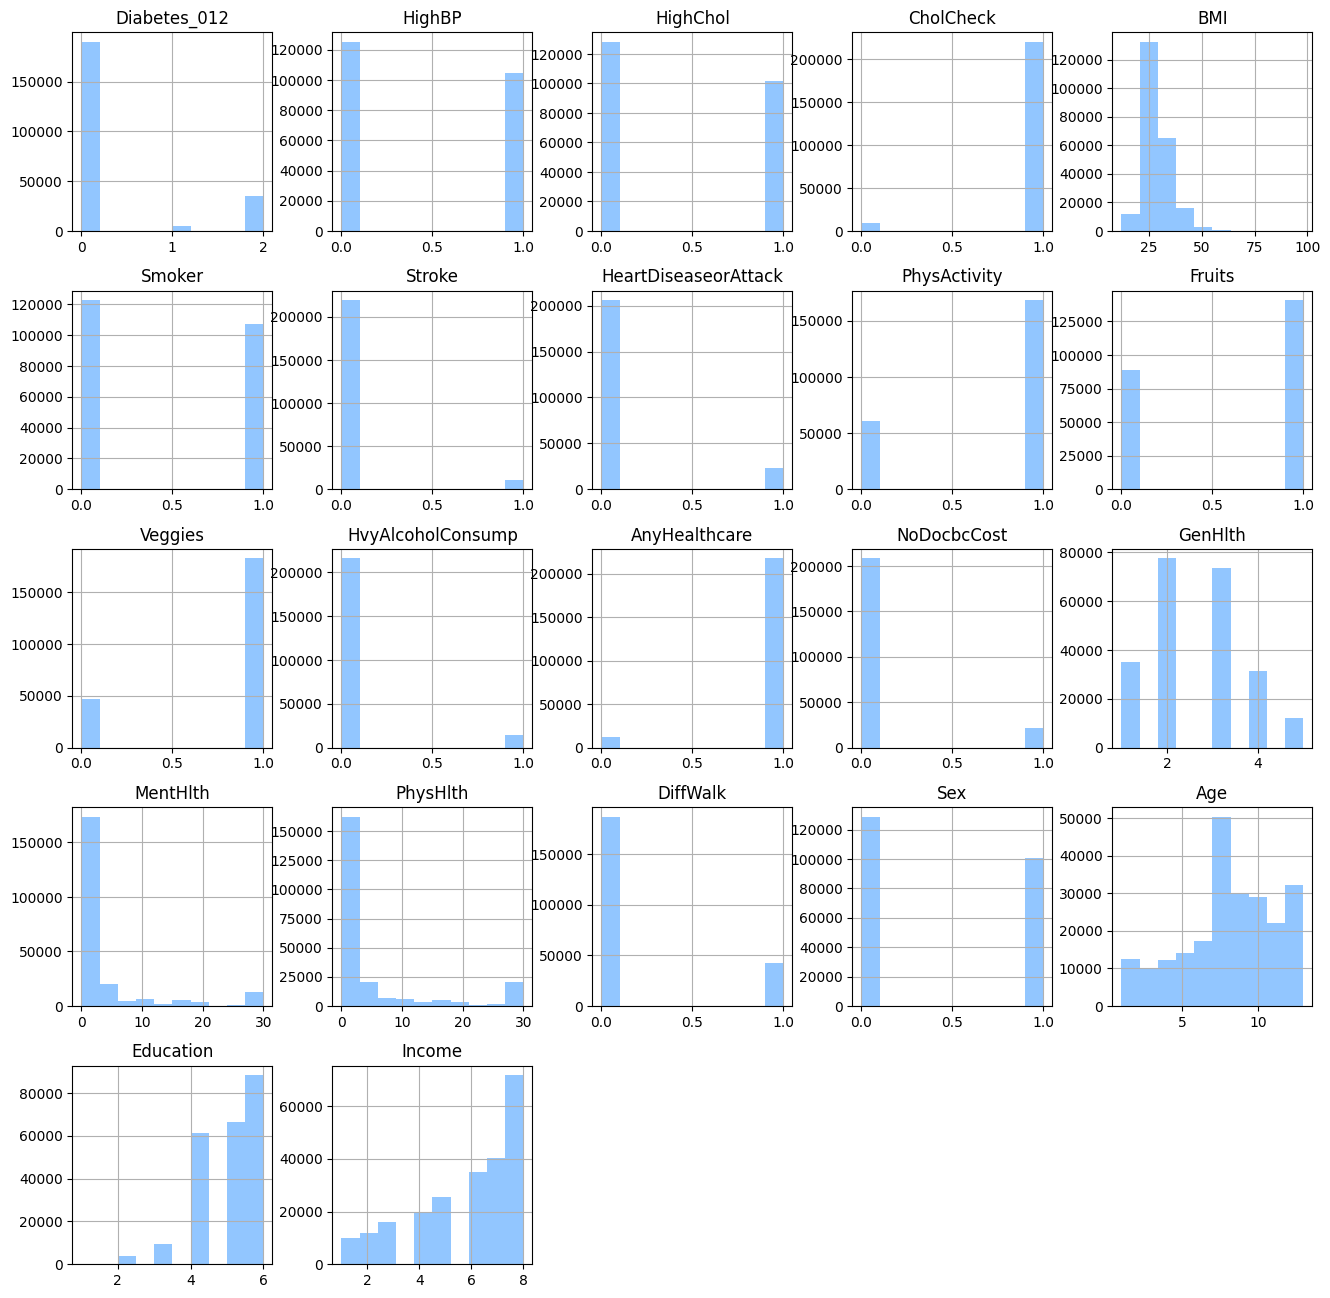

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-pastel")
plt.rcParams['font.size'] = 10
df.hist(figsize=(16, 16))

Drawing correlation plot

<Axes: title={'center': 'Correlation with Diabetes Column'}>

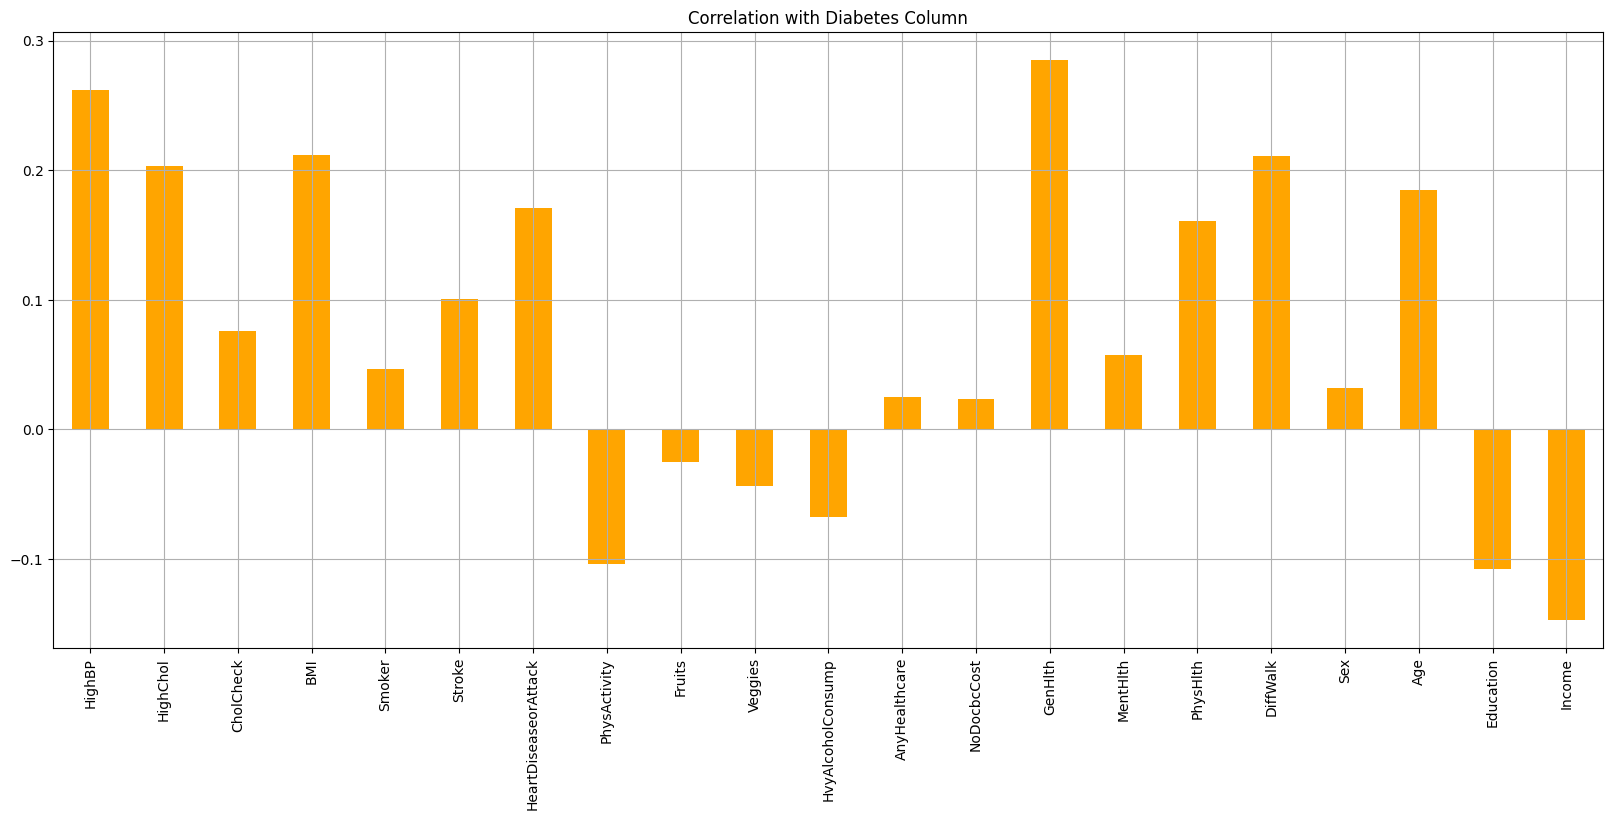

In [ ]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Diabetes Column", color='orange')

The considerable correlations with Diabetes column are General Health (1-5), Physical Health, BMI and High BP

<Axes: xlabel='Diabetes_012', ylabel='count'>

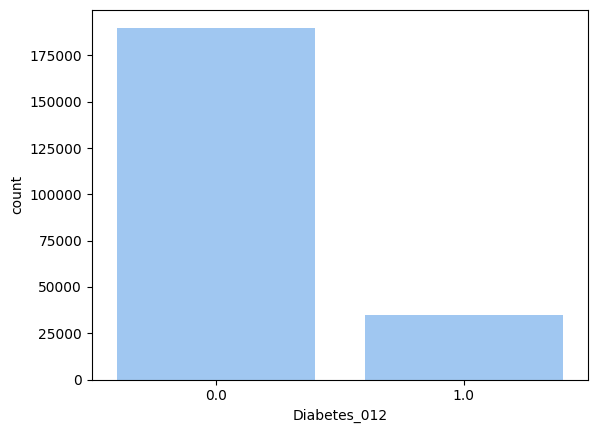

In [ ]:
# df['Diabetes_012'] = df['Diabetes_012'].replace(2, 1)
df = df[df['Diabetes_012'] != 1]
df['Diabetes_012'] = df['Diabetes_012'].replace(2, 1)


# Count occurrences of 0 and 1
# counts = df['Diabetes_012'].value_counts()

sns.countplot(data=df, x='Diabetes_012')

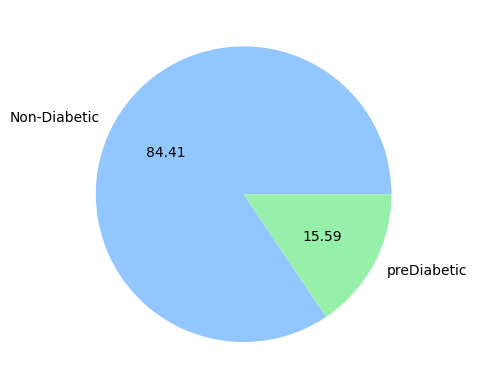

In [ ]:
labels=['Non-Diabetic', 'preDiabetic']
plt.pie(df["Diabetes_012"].value_counts() ,labels=labels, autopct='%.02f' );

There is high class imbalance. To be precise we need to run value_counts method.

In [ ]:
df.Diabetes_012.value_counts()

,count
Diabetes_012,
0.0,190055
1.0,35097


## Converting Discrete Features in Categories

In [ ]:
binary_columns = df.columns[(df.nunique() == 2)].tolist()
binary_columns

['Diabetes_012',
 'HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex']

In [ ]:
df[binary_columns] = df[binary_columns].astype(int)

# Preprocessing

## Feature Scaling

BMI: The BMI feature has a wide range (min: 12.0, max: 98.0). Since it's a numeric feature with varying scales, it should be scaled.

GenHlth: This feature ranges from 1.0 to 5.0, representing different health states. Though the range is relatively small, scaling might still help in models sensitive to feature scales (like k-NN or SVM).

MentHlth and PhysHlth: These features have a range from 0 to 30, indicating the number of unhealthy days. Scaling can ensure these features don't dominate models like Logistic Regression.

Age: The Age feature ranges from 1.0 to 13.0. Even though the range is smaller, normalizing it can be beneficial for models sensitive to scale.

Income: The Income feature ranges from 1.0 to 8.0. This feature might also benefit from scaling, especially if it's used alongside other features with smaller ranges.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']] = scaler.fit_transform(df[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']])

In [ ]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,0.325581,1,0,0,0,0,...,1,0,1.00,0.6,0.5,1,0,0.666667,4.0,0.285714
1,0,0,0,0,0.151163,1,0,0,1,0,...,0,1,0.50,0.0,0.0,0,0,0.500000,6.0,0.000000
2,0,1,1,1,0.186047,0,0,0,0,1,...,1,1,1.00,1.0,1.0,1,0,0.666667,4.0,1.000000
3,0,1,0,1,0.174419,0,0,0,1,1,...,1,0,0.25,0.0,0.0,0,0,0.833333,3.0,0.714286
4,0,1,1,1,0.139535,0,0,0,1,1,...,1,0,0.25,0.1,0.0,0,0,0.833333,5.0,0.428571


## Handling Class Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,StratifiedKFold


X = df.drop('Diabetes_012', axis=1)  # Features
y = df['Diabetes_012']               # Target variable


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

# Lists to store results
fold_accuracies = []


Adding additional library

In [ ]:
!pip install XGBoost
!pip install lightgbm

In [ ]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Diabetes_012, dtype: int64


Training four model in one code
XGBoost ,
Random Forest,
Decision Tree, and
Gradient boosting

In [ ]:
from re import M
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score,roc_auc_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

models = {
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=5, max_features='sqrt'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5),
}


fold_accuracies = {
    "Decision Tree": [],
    "Random Forest": [],
    "Gradient Boosting": [],
    "XGBoost": [],
}


fold_f1_scores = {
    "Decision Tree": [],
    "Random Forest": [],
    "Gradient Boosting": [],
    "XGBoost": [],
}
prec= {
    "Decision Tree": [],
    "Random Forest": [],
    "Gradient Boosting": [],
    "XGBoost": [],
}
rec= {
    "Decision Tree": [],
    "Random Forest": [],
    "Gradient Boosting": [],
    "XGBoost": [],
}
roc_auc= {
    "Decision Tree": [],
    "Random Forest": [],
    "Gradient Boosting": [],
    "XGBoost": [],
}
conf_mat= {
    "Decision Tree": [],
    "Random Forest": [],
    "Gradient Boosting": [],
    "XGBoost": [],
}

for train_index, test_index in skf.split(X, y):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

  # Apply SMOTE only on the training set
  X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
  print(f"Training Features Shape: {X_resampled.shape}")
  print(f"Test Features Shape: {X_test.shape}")
  print(f"Training Labels Shape: {y_resampled.shape}")
  print(f"Test Labels Shape: {y_test.shape}")


  for keys in models:
    models[keys].fit(X_resampled, y_resampled)

    y_pred = models[keys].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{keys} Accuracy: {accuracy}")



    y_proba = models[keys].predict_proba(X_test)[:, 1] #if hasattr(models[keys], "predict_proba") else None
    AOC = roc_auc_score(y_test, y_proba, multi_class='ovr') if y_proba is not None else np.nan

    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    confusion= confusion_matrix(y_test, y_pred)

    print(f"{keys} Accuracy: {accuracy}")
    print(f"{keys} F1 Score: {f1}")
    print(f"{keys} Precision: {precision}")
    print(f"{keys} Recall: {recall}")
    print(f"{keys} Confusion Matrix: {confusion}")
    print(f"{keys} ROC AUC: {AOC}")


    fold_accuracies[keys].append(accuracy)
    fold_f1_scores[keys].append(f1)
    prec[keys].append(precision)
    rec[keys].append(recall)
    roc_auc[keys].append(AOC)
    conf_mat[keys].append(confusion)








Training Features Shape: (304088, 21)
Test Features Shape: (45031, 21)
Training Labels Shape: (304088,)
Test Labels Shape: (45031,)
XGBoost Accuracy: 0.8460616020075059
XGBoost Accuracy: 0.8460616020075059
XGBoost F1 Score: 0.8292240475275736
XGBoost Precision: 0.8226453035634171
XGBoost Recall: 0.8460616020075059
XGBoost Confusion Matrix: [[35971  2040]
 [ 4892  2128]]
XGBoost ROC AUC: 0.8185683091736602
Random Forest Accuracy: 0.8191246030512314
Random Forest Accuracy: 0.8191246030512314
Random Forest F1 Score: 0.823142578777154
Random Forest Precision: 0.827774304904209
Random Forest Recall: 0.8191246030512314
Random Forest Confusion Matrix: [[33527  4484]
 [ 3661  3359]]
Random Forest ROC AUC: 0.8124978273270873
Decision Tree Accuracy: 0.8077546579023339
Decision Tree Accuracy: 0.8077546579023339
Decision Tree F1 Score: 0.8140461827451797
Decision Tree Precision: 0.821684066972332
Decision Tree Recall: 0.8077546579023339
Decision Tree Confusion Matrix: [[33053  4958]
 [ 3699  3321]

For ensemble major voting method

In [ ]:
from sklearn.ensemble import VotingClassifier
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

# Define base models
models = {
    # "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=5, max_features='sqrt'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=5),

}

# Define the voting classifier for Major Voting Ensemble
voting_clf = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='hard')

# Initialize dictionaries to store performance metrics
fold_accuracies = {model: [] for model in models}
fold_f1_scores = {model: [] for model in models}
prec = {model: [] for model in models}
rec = {model: [] for model in models}
roc_auc = {model: [] for model in models}
# conf_mat = {model: [] for model in models}
ensemble_conf=[]
# Iterate over folds for training and evaluation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply SMOTE only on the training set
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    print(f"Training Features Shape: {X_resampled.shape}")
    print(f"Test Features Shape: {X_test.shape}")
    print(f"Training Labels Shape: {y_resampled.shape}")
    print(f"Test Labels Shape: {y_test.shape}")

    # Train individual models and the ensemble
    # for name, model in models.items():
    #     model.fit(X_resampled, y_resampled)

    # Fit the voting classifier (Majority Vote Ensemble)
    voting_clf.fit(X_resampled, y_resampled)

    # Get predictions from each model and the ensemble
    # individual_predictions = np.array([model.predict(X_test) for model in models.values()])
    ensemble_predictions = voting_clf.predict(X_test)

    # Evaluate individual models and the ensemble
    # for i, (name, model) in enumerate(models.items()):
    #     y_pred = individual_predictions[i]

    #     accuracy = accuracy_score(y_test, y_pred)
    #     f1 = f1_score(y_test, y_pred, average='weighted')
    #     precision = precision_score(y_test, y_pred, average='weighted')
    #     recall = recall_score(y_test, y_pred, average='weighted')
    #     y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    #     AOC = roc_auc_score(y_test, y_proba, multi_class='ovo') if y_proba is not None else np.nan
    #     confusion = confusion_matrix(y_test, y_pred)

    #     print(f"{name} Accuracy: {accuracy}")
    #     print(f"{name} F1 Score: {f1}")
    #     print(f"{name} Precision: {precision}")
    #     print(f"{name} Recall: {recall}")
    #     print(f"{name} Confusion Matrix: {confusion}")
    #     print(f"{name} ROC AUC: {AOC}")

    #     fold_accuracies[name].append(accuracy)
    #     fold_f1_scores[name].append(f1)
    #     prec[name].append(precision)
    #     rec[name].append(recall)
    #     roc_auc[name].append(AOC)
    #     conf_mat[name].append(confusion)

    # Evaluate Ensemble's performance
    accuracy_ensemble = accuracy_score(y_test, ensemble_predictions)
    f1_ensemble = f1_score(y_test, ensemble_predictions, average='weighted')
    precision_ensemble = precision_score(y_test, ensemble_predictions, average='weighted')
    recall_ensemble = recall_score(y_test, ensemble_predictions, average='weighted')
    y_proba_ensemble = voting_clf.predict_proba(X_test)[:, 1] if hasattr(voting_clf, "predict_proba") else None
    AOC_ensemble = roc_auc_score(y_test, y_proba_ensemble, multi_class='ovo') if y_proba_ensemble is not None else np.nan
    confusion_ensemble = confusion_matrix(y_test, ensemble_predictions)

    print(f"Ensemble Accuracy: {accuracy_ensemble}")
    print(f"Ensemble F1 Score: {f1_ensemble}")
    print(f"Ensemble Precision: {precision_ensemble}")
    print(f"Ensemble Recall: {recall_ensemble}")
    print(f"Ensemble Confusion Matrix: {confusion_ensemble}")
    print(f"Ensemble ROC AUC: {AOC_ensemble}")
    ensemble_conf.append(confusion_ensemble)


Training Features Shape: (304088, 21)
Test Features Shape: (45031, 21)
Training Labels Shape: (304088,)
Test Labels Shape: (45031,)
Ensemble Accuracy: 0.8444627034709422
Ensemble F1 Score: 0.8302356042900035
Ensemble Precision: 0.8234729165910164
Ensemble Recall: 0.8444627034709422
Ensemble Confusion Matrix: [[35749  2262]
 [ 4742  2278]]
Ensemble ROC AUC: nan
Training Features Shape: (304088, 21)
Test Features Shape: (45031, 21)
Training Labels Shape: (304088,)
Test Labels Shape: (45031,)
Ensemble Accuracy: 0.8436854611267793
Ensemble F1 Score: 0.8305496415371658
Ensemble Precision: 0.8238233424035376
Ensemble Recall: 0.8436854611267793
Ensemble Confusion Matrix: [[35650  2361]
 [ 4678  2342]]
Ensemble ROC AUC: nan
Training Features Shape: (304088, 21)
Test Features Shape: (45030, 21)
Training Labels Shape: (304088,)
Test Labels Shape: (45030,)
Ensemble Accuracy: 0.8434155007772596
Ensemble F1 Score: 0.8294150137143406
Ensemble Precision: 0.8225304720527312
Ensemble Recall: 0.84341550

**Evaluation metrix** <br/>

Averaged the confusion matrix from all folds and then calculated the performance metrics

<br/>

**Evalution metrics for Healthy individual prediction analysis**

In [ ]:
import numpy as np

# Did this because it was taking a lot of time for training and Recall and accuracy was same in earlier cases. That why I calculated it manually

# using confusion matrix to generate Performance metric for health  individual
# Data for Random Forest, Decision Tree, and Gradient Boosting confusion matrices
random_forest_matrices = conf_mat['Random Forest']

xgboost = conf_mat['XGBoost']

ensemble = ensemble_conf

decision_tree_matrices = conf_mat['Decision Tree']

gradient_boosting_matrices = conf_mat['Gradient Boosting']

# Function to calculate the metrics
def calculate_metrics(conf_matrix):
    TP = conf_matrix[0, 0]  # True Positive
    TN = conf_matrix[1, 1]  # True Negative
    FP = conf_matrix[0, 1]  # False Positive
    FN = conf_matrix[1, 0]  # False Negative

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    f2_score = (5 * precision * recall) / (4 * precision + recall) if (4 * precision + recall) != 0 else 0
    f3_score = (10 * precision * recall) / (9 * precision + recall) if (9 * precision + recall) != 0 else 0

    return accuracy, precision, recall, f1_score, f2_score, f3_score

# Calculate average confusion matrices for each model
random_forest_avg = np.average(random_forest_matrices, axis=0)
decision_tree_avg = np.average(decision_tree_matrices, axis=0)
gradient_boosting_avg = np.average(gradient_boosting_matrices, axis=0)
ensemble_avg = np.average(ensemble, axis=0)

xg_avg = np.average(xgboost, axis=0)

# print(random_forest_avg)
# Calculate metrics for each model
rf_metrics = calculate_metrics(random_forest_avg)
dt_metrics = calculate_metrics(decision_tree_avg)
gb_metrics = calculate_metrics(gradient_boosting_avg)
e_metrics = calculate_metrics(ensemble_avg)
xg_metrics = calculate_metrics(xg_avg)



# Print the results for each model
print("Random Forest Metrics:")
print(f"Accuracy: {rf_metrics[0]:.4f}")
print(f"Precision: {rf_metrics[1]:.4f}")
print(f"Recall: {rf_metrics[2]:.4f}")
print(f"F1 Score: {rf_metrics[3]:.4f}")
print(f"F2 Score: {rf_metrics[4]:.4f}")
print(f"F3 Score: {rf_metrics[5]:.4f}\n")
print(f"confusion matrix: ",random_forest_avg )
print()

print("xgboost  Forest Metrics:")
print(f"Accuracy: {xg_metrics[0]:.4f}")
print(f"Precision: {xg_metrics[1]:.4f}")
print(f"Recall: {xg_metrics[2]:.4f}")
print(f"F1 Score: {xg_metrics[3]:.4f}")
print(f"F2 Score: {xg_metrics[4]:.4f}")
print(f"F3 Score: {xg_metrics[5]:.4f}\n")
print(f"confusion matrix: ",xg_avg )
print()

print("Decision Tree Metrics:")
print(f"Accuracy: {dt_metrics[0]:.4f}")
print(f"Precision: {dt_metrics[1]:.4f}")
print(f"Recall: {dt_metrics[2]:.4f}")
print(f"F1 Score: {dt_metrics[3]:.4f}")
print(f"F2 Score: {dt_metrics[4]:.4f}")
print(f"F3 Score: {dt_metrics[5]:.4f}\n")
print(f"confusion matrix: ",decision_tree_avg )
print()


print("Gradient Boosting Metrics:")
print(f"Accuracy: {gb_metrics[0]:.4f}")
print(f"Precision: {gb_metrics[1]:.4f}")
print(f"Recall: {gb_metrics[2]:.4f}")
print(f"F1 Score: {gb_metrics[3]:.4f}")
print(f"F2 Score: {gb_metrics[4]:.4f}")
print(f"F3 Score: {gb_metrics[5]:.4f}")
print(f"confusion matrix: ",gradient_boosting_avg )
print()


print("ensemble Boosting Metrics:")
print(f"Accuracy: {e_metrics[0]:.4f}")
print(f"Precision: {e_metrics[1]:.4f}")
print(f"Recall: {e_metrics[2]:.4f}")
print(f"F1 Score: {e_metrics[3]:.4f}")
print(f"F2 Score: {e_metrics[4]:.4f}")
print(f"F3 Score: {e_metrics[5]:.4f}")
print(f"confusion matrix: ",ensemble_avg )
print()


Random Forest Metrics:
Accuracy: 0.8183
Precision: 0.8797
Recall: 0.9025
F1 Score: 0.8910
F2 Score: 0.8979
F3 Score: 0.9002

confusion matrix:  [[33439.6  4571.4]
 [ 3611.8  3407.6]]

xgboost  Forest Metrics:
Accuracy: 0.8459
Precision: 0.9444
Recall: 0.8815
F1 Score: 0.9119
F2 Score: 0.8934
F3 Score: 0.8874

confusion matrix:  [[35899.   2112. ]
 [ 4825.6  2193.8]]

Decision Tree Metrics:
Accuracy: 0.7994
Precision: 0.8569
Recall: 0.9006
F1 Score: 0.8782
F2 Score: 0.8915
F3 Score: 0.8960

confusion matrix:  [[32571.   5440. ]
 [ 3595.   3424.4]]

Gradient Boosting Metrics:
Accuracy: 0.8444
Precision: 0.9389
Recall: 0.8840
F1 Score: 0.9106
F2 Score: 0.8945
F3 Score: 0.8892
confusion matrix:  [[35671.2  2322.4]
 [ 4680.6  2346. ]]

ensemble Boosting Metrics:
Accuracy: 0.8445
Precision: 0.9394
Recall: 0.8837
F1 Score: 0.9107
F2 Score: 0.8943
F3 Score: 0.8890
confusion matrix:  [[35707.4  2303.6]
 [ 4699.6  2319.8]]



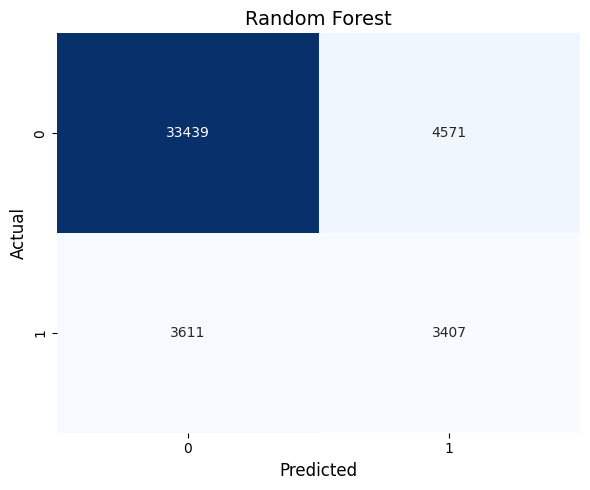

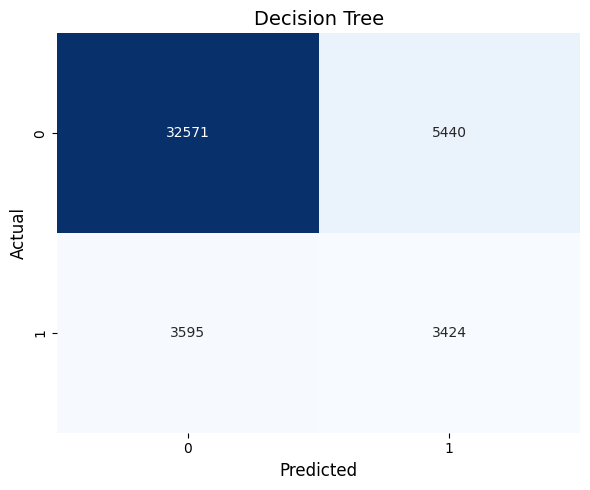

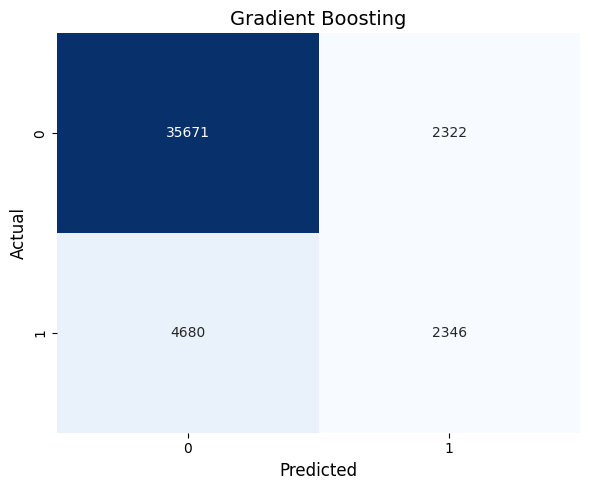

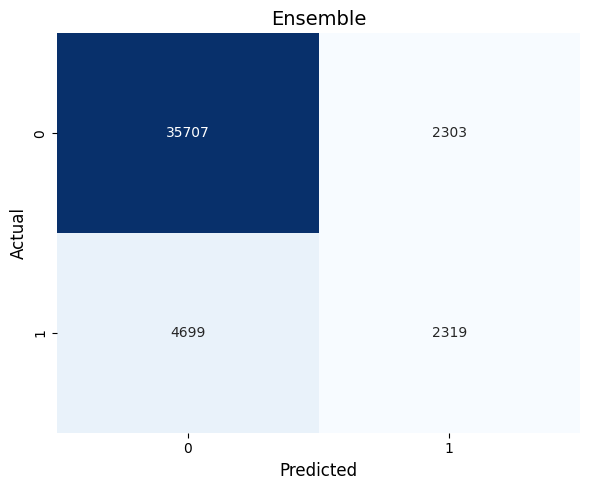

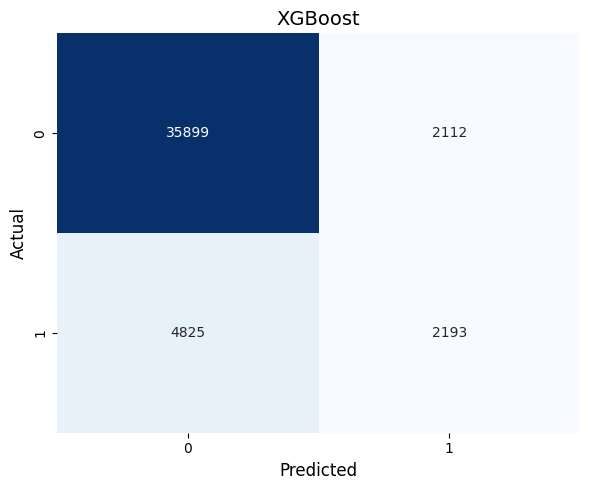

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot a single confusion matrix
def plot_confusion_matrix(matrix, title):
    matrix = matrix.astype(int)
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title, fontsize=14)
    plt.xlabel("Predicted", fontsize=12)
    plt.ylabel("Actual", fontsize=12)
    plt.tight_layout()
    plt.show()

# Plotting confusion matrices for all models
plot_confusion_matrix(random_forest_avg, "Random Forest")
plot_confusion_matrix(decision_tree_avg, "Decision Tree")
plot_confusion_matrix(gradient_boosting_avg, "Gradient Boosting")
plot_confusion_matrix(ensemble_avg, "Ensemble")
plot_confusion_matrix(xg_avg, "XGBoost")

Evalution metrics for Risk prediction for diabetes

In [ ]:
import numpy as np

#using confusion matrix to generate Performance metric for risk accessment of  individual

# Data for Random Forest, Decision Tree, and Gradient Boosting confusion matrices
random_forest_matrices = conf_mat['Random Forest']

xgboost = conf_mat['XGBoost']

ensemble = ensemble_conf

decision_tree_matrices = conf_mat['Decision Tree']

gradient_boosting_matrices = conf_mat['Gradient Boosting']

# Function to calculate the metrics
def calculate_metrics(conf_matrix):
    TP = conf_matrix[1, 1]  # True Positive
    TN = conf_matrix[0, 0]  # True Negative
    FP = conf_matrix[1, 0]  # False Positive
    FN = conf_matrix[0, 1]  # False Negative

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    f2_score = (5 * precision * recall) / (4 * precision + recall) if (4 * precision + recall) != 0 else 0
    f3_score = (10 * precision * recall) / (9 * precision + recall) if (9 * precision + recall) != 0 else 0

    return accuracy, precision, recall, f1_score, f2_score, f3_score

# Calculate average confusion matrices for each model
random_forest_avg = np.average(random_forest_matrices, axis=0)
decision_tree_avg = np.average(decision_tree_matrices, axis=0)
gradient_boosting_avg = np.average(gradient_boosting_matrices, axis=0)
ensemble_avg = np.average(ensemble, axis=0)

xg_avg = np.average(xgboost, axis=0)

print(random_forest_avg)
# Calculate metrics for each model
rf_metrics = calculate_metrics(random_forest_avg)
dt_metrics = calculate_metrics(decision_tree_avg)
gb_metrics = calculate_metrics(gradient_boosting_avg)
e_metrics = calculate_metrics(ensemble_avg)
xg_metrics = calculate_metrics(xg_avg)



# Print the results for each model
print("Random Forest Metrics:")
print(f"Accuracy: {rf_metrics[0]:.4f}")
print(f"Precision: {rf_metrics[1]:.4f}")
print(f"Recall: {rf_metrics[2]:.4f}")
print(f"F1 Score: {rf_metrics[3]:.4f}")
print(f"F2 Score: {rf_metrics[4]:.4f}")
print(f"F3 Score: {rf_metrics[5]:.4f}\n")

print("xgboost  Forest Metrics:")
print(f"Accuracy: {xg_metrics[0]:.4f}")
print(f"Precision: {xg_metrics[1]:.4f}")
print(f"Recall: {xg_metrics[2]:.4f}")
print(f"F1 Score: {xg_metrics[3]:.4f}")
print(f"F2 Score: {xg_metrics[4]:.4f}")
print(f"F3 Score: {xg_metrics[5]:.4f}\n")

print("Decision Tree Metrics:")
print(f"Accuracy: {dt_metrics[0]:.4f}")
print(f"Precision: {dt_metrics[1]:.4f}")
print(f"Recall: {dt_metrics[2]:.4f}")
print(f"F1 Score: {dt_metrics[3]:.4f}")
print(f"F2 Score: {dt_metrics[4]:.4f}")
print(f"F3 Score: {dt_metrics[5]:.4f}\n")

print("Gradient Boosting Metrics:")
print(f"Accuracy: {gb_metrics[0]:.4f}")
print(f"Precision: {gb_metrics[1]:.4f}")
print(f"Recall: {gb_metrics[2]:.4f}")
print(f"F1 Score: {gb_metrics[3]:.4f}")
print(f"F2 Score: {gb_metrics[4]:.4f}")
print(f"F3 Score: {gb_metrics[5]:.4f}")

print("ensemble Boosting Metrics:")
print(f"Accuracy: {e_metrics[0]:.4f}")
print(f"Precision: {e_metrics[1]:.4f}")
print(f"Recall: {e_metrics[2]:.4f}")
print(f"F1 Score: {e_metrics[3]:.4f}")
print(f"F2 Score: {e_metrics[4]:.4f}")
print(f"F3 Score: {e_metrics[5]:.4f}")

[[33439.6  4571.4]
 [ 3611.8  3407.6]]
Random Forest Metrics:
Accuracy: 0.8183
Precision: 0.4855
Recall: 0.4271
F1 Score: 0.4544
F2 Score: 0.4376
F3 Score: 0.4323

xgboost  Forest Metrics:
Accuracy: 0.8459
Precision: 0.3125
Recall: 0.5095
F1 Score: 0.3874
F2 Score: 0.4525
F3 Score: 0.4793

Decision Tree Metrics:
Accuracy: 0.7994
Precision: 0.4878
Recall: 0.3863
F1 Score: 0.4312
F2 Score: 0.4031
F3 Score: 0.3945

Gradient Boosting Metrics:
Accuracy: 0.8444
Precision: 0.3339
Recall: 0.5025
F1 Score: 0.4012
F2 Score: 0.4564
F3 Score: 0.4784
ensemble Boosting Metrics:
Accuracy: 0.8445
Precision: 0.3305
Recall: 0.5018
F1 Score: 0.3985
F2 Score: 0.4546
F3 Score: 0.4770


Other models analysis *at* https://github.com/znerf/diabetes-detection